In [1]:
from bioservices import KEGG
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

# Initialize KEGG service
kegg = KEGG()

# Your list of proteins (example using KEGG identifiers)
# protein_list = ["P53", "BRCA1", "CDK2"]  # Replace with your actual list

# protein_list = ['ABCB8', 'ACADSB', 'ACOT7', 'AIFM1', 'ARNT', 'ATM',
#        'ATP6V1D', 'BCL2L1', 'BIRC2', 'CA2', 'CAMK2D', 'CARMIL1', 'CASP7',
#        'CCDC167', 'CDKN1A', 'CDKN1B', 'CHUK', 'COX6A1', 'COX6C', 'COX7A2',
#        'COX7C', 'CPOX', 'EGFR', 'FDX1', 'GLUD1', 'GOLPH3L', 'GPX1', 'GPX4',
#        'HACL1', 'HADH', 'IDH1', 'IDI1', 'IL4I1', 'KEAP1', 'LDHA', 'LGALS1',
#        'LTA4H', 'MTDH', 'MYD88', 'NBN', 'NCAPH2', 'NDUFB3', 'NFKB1', 'NFKB2',
#        'PDK1', 'PECR', 'PLIN2', 'PTGES2', 'RAB25', 'RELA', 'RHOA', 'RIPK1',
#        'RPS6KB2', 'S100A10', 'SENP1', 'STAT3', 'TALDO1', 'TFRC', 'TGM2',
#        'TOP3B', 'TPMT', 'VCAM1', 'XIAP', 'YWHAG']


df = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/data/FFPE_Discovery_Chowdhury/FFPE_Discovery_normalized.csv",header=0,low_memory=False)
all_prots = df.iloc[:, 1:8801].columns
protein_list = all_prots.to_list()


# Function to get pathway information for each protein
def get_pathways(protein):
    try:
        pathways = kegg.get_pathway_by_gene(protein, "hsa")  # hsa for Homo sapiens
        return set(pathways.keys()) if pathways else set()
    except Exception as e:
        print(f"Error retrieving pathways for {protein}: {e}")
        return set()

# Retrieve pathways for each protein
protein_pathways = {protein: get_pathways(protein) for protein in protein_list}

# Function to create a similarity matrix based on shared pathways
def create_similarity_matrix(protein_pathways):
    proteins = list(protein_pathways.keys())
    matrix = np.zeros((len(proteins), len(proteins)))

    for i, protein1 in enumerate(proteins):
        for j, protein2 in enumerate(proteins):
            shared_pathways = protein_pathways[protein1].intersection(protein_pathways[protein2])
            matrix[i, j] = 1 if shared_pathways else 0

    return matrix, proteins

def create_refined_similarity_matrix(protein_pathways):
    proteins = list(protein_pathways.keys())
    matrix = np.zeros((len(proteins), len(proteins)))

    for i, protein1 in enumerate(proteins):
        for j, protein2 in enumerate(proteins):
            if i != j:
                shared_pathways = protein_pathways[protein1].intersection(protein_pathways[protein2])
                total_pathways = protein_pathways[protein1].union(protein_pathways[protein2])
                matrix[i, j] = len(shared_pathways) / len(total_pathways) if total_pathways else 0

    return matrix, proteins

similarity_matrix, proteins = create_refined_similarity_matrix(protein_pathways)



WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Forbidden
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not o

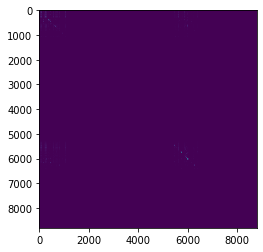

In [2]:

import matplotlib.pylab as plt 

plt.imshow(similarity_matrix)

In [5]:
# Clustering
n_clusters = 100  # Set the number of clusters; adjust as needed
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(similarity_matrix)

# Assign Proteins to Clusters
protein_clusters = {protein: cluster for protein, cluster in zip(proteins, clusters)}

# Convert to DataFrame for easier viewing
df = pd.DataFrame(list(protein_clusters.items()), columns=['Protein', 'Cluster'])

print(df)

df["Cluster"].value_counts()

     Protein  Cluster
0       A1BG        0
1        A2M       96
2       AAAS       35
3       AACS       24
4      AAGAB        0
...      ...      ...
8795   ZWINT        0
8796  ZYG11B        0
8797     ZYX        0
8798   ZZEF1        0
8799    ZZZ3        0

[8800 rows x 2 columns]


0     7846
12      47
24      43
2       33
89      28
      ... 
74       3
91       2
88       2
64       2
49       2
Name: Cluster, Length: 100, dtype: int64

In [ ]:
# use the 100 clusters?


In [6]:
from bioservices import KEGG
import pandas as pd


protein_list = ['ABCB8', 'ACADSB', 'ACOT7', 'AIFM1', 'ARNT', 'ATM',
       'ATP6V1D', 'BCL2L1', 'BIRC2', 'CA2', 'CAMK2D', 'CARMIL1', 'CASP7',
       'CCDC167', 'CDKN1A', 'CDKN1B', 'CHUK', 'COX6A1', 'COX6C', 'COX7A2',
       'COX7C', 'CPOX', 'EGFR', 'FDX1', 'GLUD1', 'GOLPH3L', 'GPX1', 'GPX4',
       'HACL1', 'HADH', 'IDH1', 'IDI1', 'IL4I1', 'KEAP1', 'LDHA', 'LGALS1',
       'LTA4H', 'MTDH', 'MYD88', 'NBN', 'NCAPH2', 'NDUFB3', 'NFKB1', 'NFKB2',
       'PDK1', 'PECR', 'PLIN2', 'PTGES2', 'RAB25', 'RELA', 'RHOA', 'RIPK1',
       'RPS6KB2', 'S100A10', 'SENP1', 'STAT3', 'TALDO1', 'TFRC', 'TGM2',
       'TOP3B', 'TPMT', 'VCAM1', 'XIAP', 'YWHAG']


# Initialize KEGG service
kegg = KEGG()

# Example list of proteins (using KEGG identifiers)
protein_list = ["P53_HUMAN", "BRCA1_HUMAN", "CDK2_HUMAN"]  # Replace with your actual list

# Function to get pathway information for each protein
def get_pathways(protein):
    try:
        pathways = kegg.get_pathway_by_gene(protein, "hsa")  # hsa for Homo sapiens
        return set(pathways.keys()) if pathways else set()
    except Exception as e:
        print(f"Error retrieving pathways for {protein}: {e}")
        return set()

# Retrieve pathways for each protein
protein_pathways = {protein: get_pathways(protein) for protein in protein_list}

# Function to assign the most significant pathway to each protein
def assign_dominant_pathway(protein_pathways):
    protein_dominant_pathway = {}

    for protein, pathways in protein_pathways.items():
        # Choose the most significant pathway based on some criteria, here just the first one
        dominant_pathway = sorted(pathways)[0] if pathways else 'Unknown'
        protein_dominant_pathway[protein] = dominant_pathway

    return protein_dominant_pathway

# Assign the most significant pathway to each protein
protein_dominant_pathway = assign_dominant_pathway(protein_pathways)

# Function to get pathway names from KEGG
def get_pathway_name(pathway_id):
    if pathway_id != 'Unknown':
        return kegg.parse(kegg.get(pathway_id)).get('NAME', 'No name available')
    return 'Unknown'

# Group proteins by their dominant pathway and fetch pathway names
pathway_groups = {}
for protein, pathway in protein_dominant_pathway.items():
    pathway_name = get_pathway_name(pathway)
    if pathway_name not in pathway_groups:
        pathway_groups[pathway_name] = []
    pathway_groups[pathway_name].append(protein)

# Convert to DataFrame for easier viewing
df_pathway_groups = pd.DataFrame([(pathway, ', '.join(proteins)) for pathway, proteins in pathway_groups.items()], columns=['Pathway Name', 'Proteins'])

print(df_pathway_groups)

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.
WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


  Pathway Name                            Proteins
0      Unknown  P53_HUMAN, BRCA1_HUMAN, CDK2_HUMAN
